In [109]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [110]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [111]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 32)        2336      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
Total params: 11,664
Trainable params: 11,664
Non-trai

In [112]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 32)        2336      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 flatten_8 (Flatten)         (None, 288)              

In [113]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=1, batch_size=64)

938/938 [==============================] - 20s 20ms/step - loss: 0.2601 - accuracy: 0.9203


In [9]:
model.save('C:/Users/dclen/Code/tensorflow-testing/')

INFO:tensorflow:Assets written to: C:/Users/dclen/Code/tensorflow-testing/assets


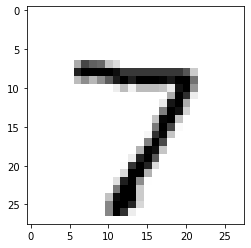

7 0.9999678


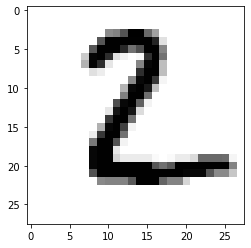

2 0.9216444


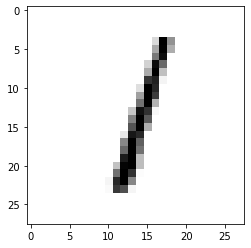

1 0.9989241


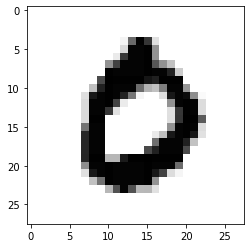

0 0.999782


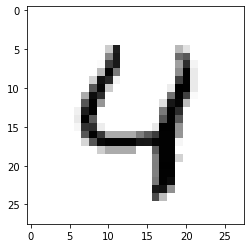

4 0.99985826


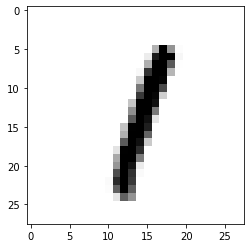

1 0.99932957


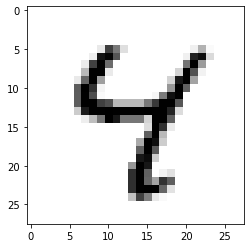

4 0.9998035


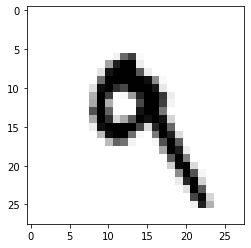

9 0.9717192


In [114]:
predicted_numeral = model.predict(test_images[:8])
for prediction in range(predicted_numeral.shape[0]):
  plt.imshow(test_images[prediction], cmap=plt.cm.binary)
  plt.show()
  print(predicted_numeral[prediction].argmax(), predicted_numeral[prediction][predicted_numeral[prediction].argmax()])

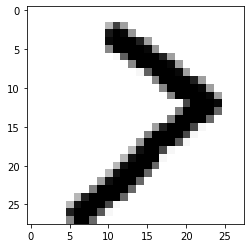

7 1.0


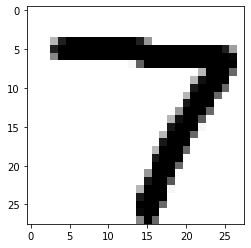

7 1.0


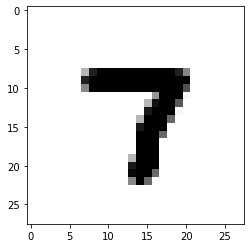

7 1.0


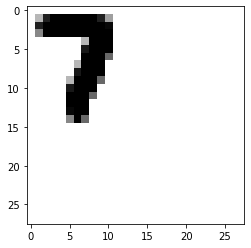

4 1.0


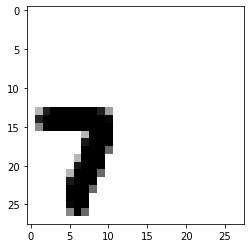

7 1.0


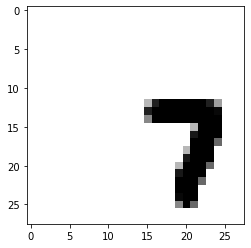

3 1.0


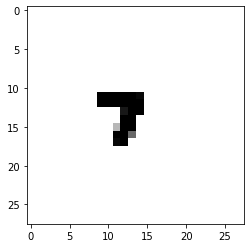

7 1.0


In [116]:
import pathlib
image_dir = 'test-datasets/sevens'
image_root = pathlib.Path(image_dir)
list_ds = tf.data.Dataset.list_files(str(image_root/'*.png'))
for f in list_ds:
  image = tf.io.read_file(f)
  image = tf.io.decode_png(image, channels=1)
  digit = image[None, :, :]
  predicted_numeral = model.predict(digit)
  plt.imshow(digit[0, :, :, 0], cmap=plt.cm.binary)
  plt.show()
  print(predicted_numeral.argmax(), predicted_numeral[0][predicted_numeral.argmax()])